# Customer Churn Analysis Project

importing the libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

importing the dataset

In [2]:
df=pd.read_csv("Telecom_customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Dataframe Structure

In [3]:
churn=pd.DataFrame(data=df)
churn


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# EDA (Exploratory Data Analysis)

In [4]:
# Displaying all the column names of the churn Dataset
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


the null values and Data type of each columns of the Churn Dataset
Our Target Variable is object type and therefore, we will use Classifiers to build our Machine Learning Models
we can see that there are mostly object data type columns present in the Dataset

In [6]:
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

we can see is not any missing values present in churn data set

<AxesSubplot:xlabel='gender', ylabel='count'>

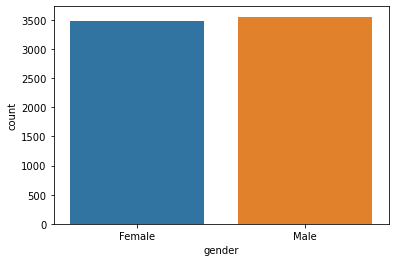

In [7]:
sns.countplot(churn["gender"])

The graph shows that there are almost equal number of male and female customers present in the Dataset

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

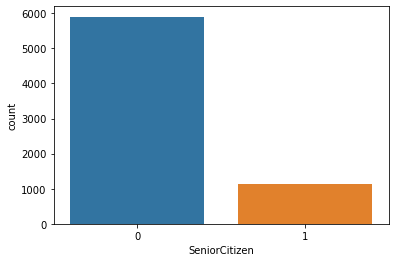

In [8]:
sns.countplot(churn["SeniorCitizen"])

the ghrapic show that very few customer in the dataset are senior citizen

<AxesSubplot:xlabel='Partner', ylabel='count'>

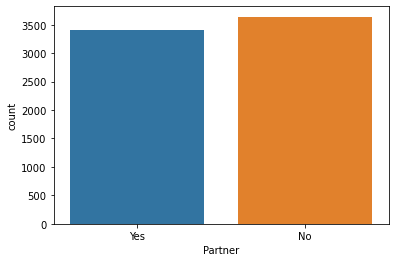

In [9]:
sns.countplot(churn["Partner"])

The graph shows that there are almost equal number of people with and without life partners

<AxesSubplot:xlabel='Dependents', ylabel='count'>

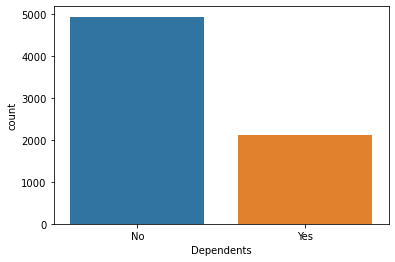

In [10]:
sns.countplot(churn["Dependents"])

The graph shows that most customers in the Dataset do not have any dependents while few customers have dependents

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

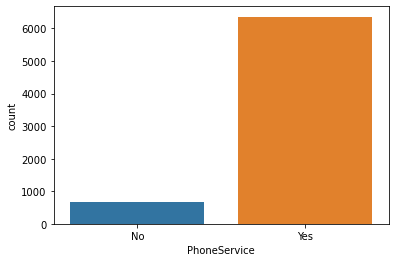

In [11]:
sns.countplot(churn["PhoneService"])

The Graph shows most customers have Phonme services while very few customers do not take phone services

<AxesSubplot:xlabel='InternetService', ylabel='count'>

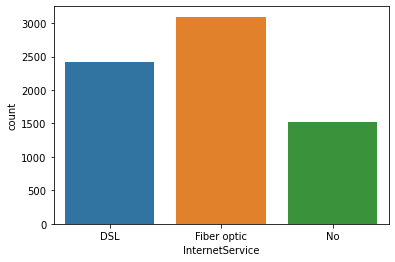

In [12]:
sns.countplot(churn["InternetService"])

The Graph shows that most customers have fiber optic internet service while few customers do not take internet services 


<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

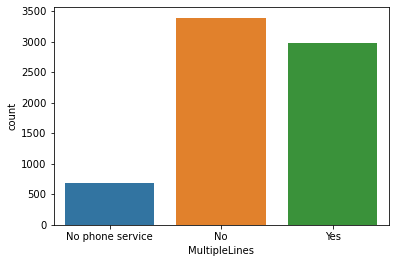

In [13]:
sns.countplot(churn["MultipleLines"])


The Graph shows that some customers with phone servies have opted for multiple lines 

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

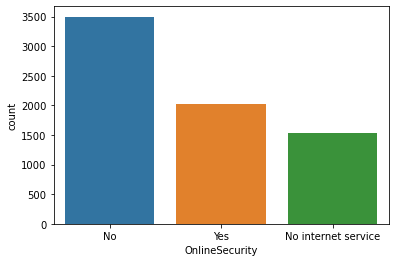

In [14]:
sns.countplot(churn["OnlineSecurity"])

The Graph shows that few customers who have opted for internet services have also opted for online security services

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

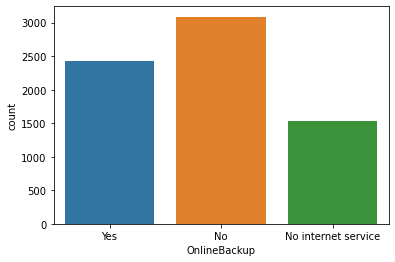

In [15]:
sns.countplot(churn["OnlineBackup"])

The Graph shows that few customers who have opted for internet services have also opted for online backup services

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

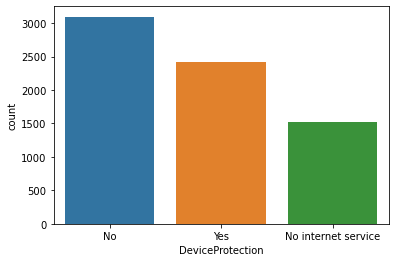

In [16]:
sns.countplot(churn["DeviceProtection"])

The Graph shows that some customers who have opted for internet services have also opted for device protection services

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

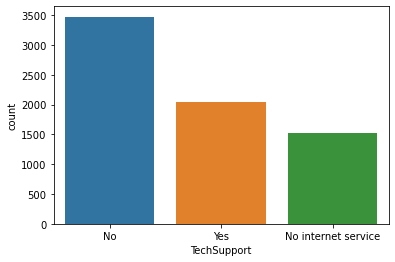

In [17]:
sns.countplot(churn["TechSupport"])


The Graph shows that very few customers who have opted for internet services have also opted for tech support services

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

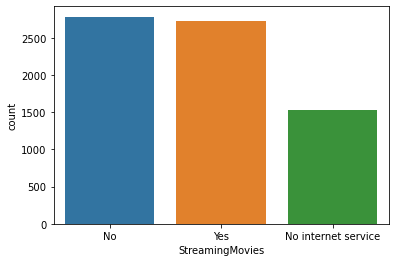

In [18]:
sns.countplot(churn["StreamingMovies"])

The Graph shows that mostly equal number of customers are there who have and who have not opted for Movie Stream Services

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

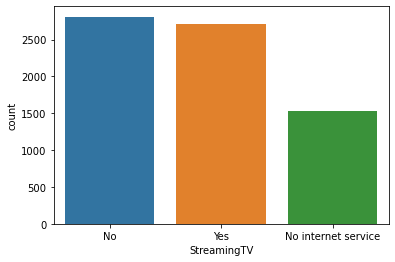

In [19]:
sns.countplot(churn["StreamingTV"])

The Graph shows that mostly equal number of customers are there who have and who have not opted for TV Stream Services

<AxesSubplot:xlabel='Contract', ylabel='count'>

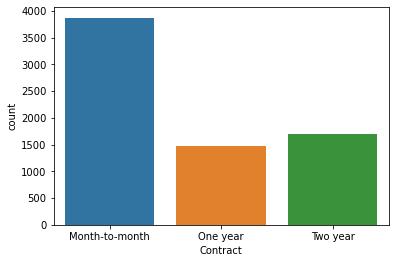

In [20]:
sns.countplot(churn["Contract"])

he Graph shows that mostly Customers prefer Month to Month payment contracts , While few cutomers prefer for long term payment contracts of 1 and 2 years

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

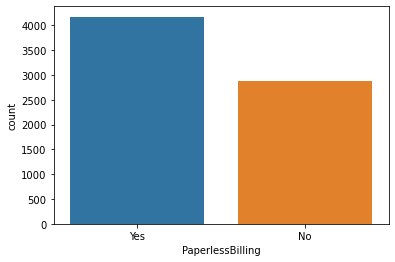

In [21]:
sns.countplot(churn["PaperlessBilling"])

The Graph shows that most customers have opted for paperless billing system

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

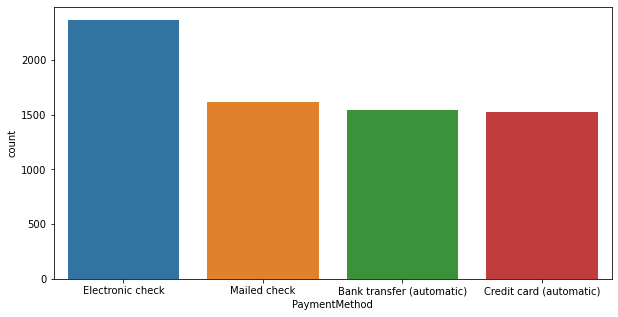

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(churn["PaymentMethod"])


The Graph shows that most customers prefer to keep their payment mode as Electronic Check

<AxesSubplot:xlabel='Churn', ylabel='count'>

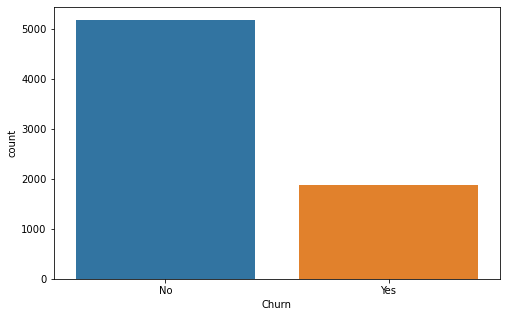

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(churn["Churn"])

The Graph shows that around 40% of customers leave the company services and therefore shows the high churn rate

<AxesSubplot:xlabel='Contract', ylabel='MonthlyCharges'>

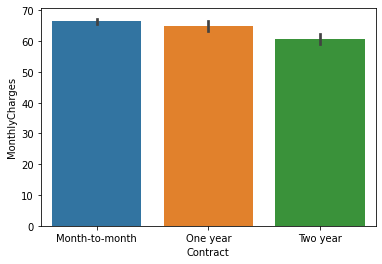

In [24]:
sns.barplot(x=churn["Contract"], y=churn["MonthlyCharges"])

The Graph shows that monthly charges are little high in month to month and slighly low in year and 2 year contract It is because long term contract cost little less so that more people gets encouraged to opt for longer contract plans

<AxesSubplot:xlabel='Contract', ylabel='tenure'>

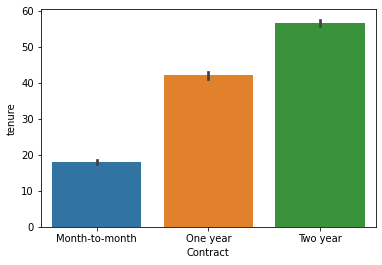

In [25]:
sns.barplot(x=churn["Contract"], y=churn["tenure"])

It shows for how much tenure the customers do which kind of contract with the company

<AxesSubplot:xlabel='Contract', ylabel='count'>

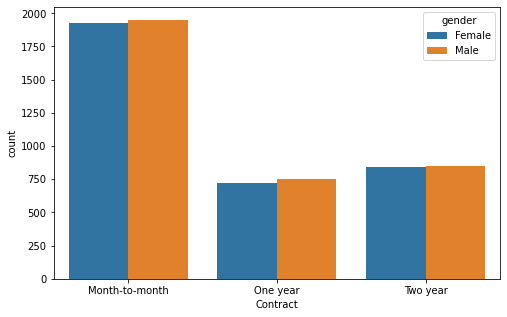

In [26]:
plt.figure(figsize=(8,5))
sns.countplot(churn["Contract"], hue=churn["gender"])

It shows that there are almost equal number of male and female customers doing same kind of contracts with the company

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

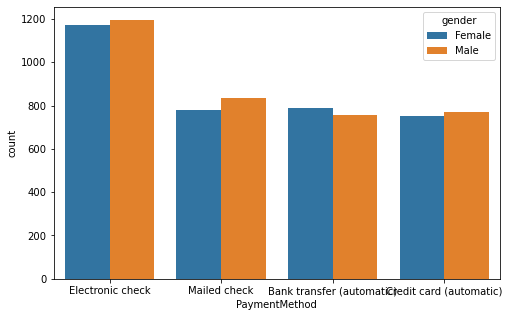

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(churn["PaymentMethod"], hue=churn["gender"])

It shows that there are almost equal number of male and female customers using same kind of payment methods

# Data Cleaning & Feature Engineering:

In [28]:
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [29]:
churn.drop(columns=["customerID"],inplace=True)

Dropping the Customer ID as it is not relevent for the Model Training

In [30]:
churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [31]:
# Importing the Label Encoder from Sklearn Library
from sklearn.preprocessing import LabelEncoder



In [32]:
le=LabelEncoder()

In [33]:
for i in churn.columns:
    if churn[i].dtypes=="object":
        churn[i]=le.fit_transform(churn[i].values.reshape(-1,1))

In [34]:
churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


In [35]:
churn_corr=churn.corr()
churn_corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.090756,-0.195525


<AxesSubplot:>

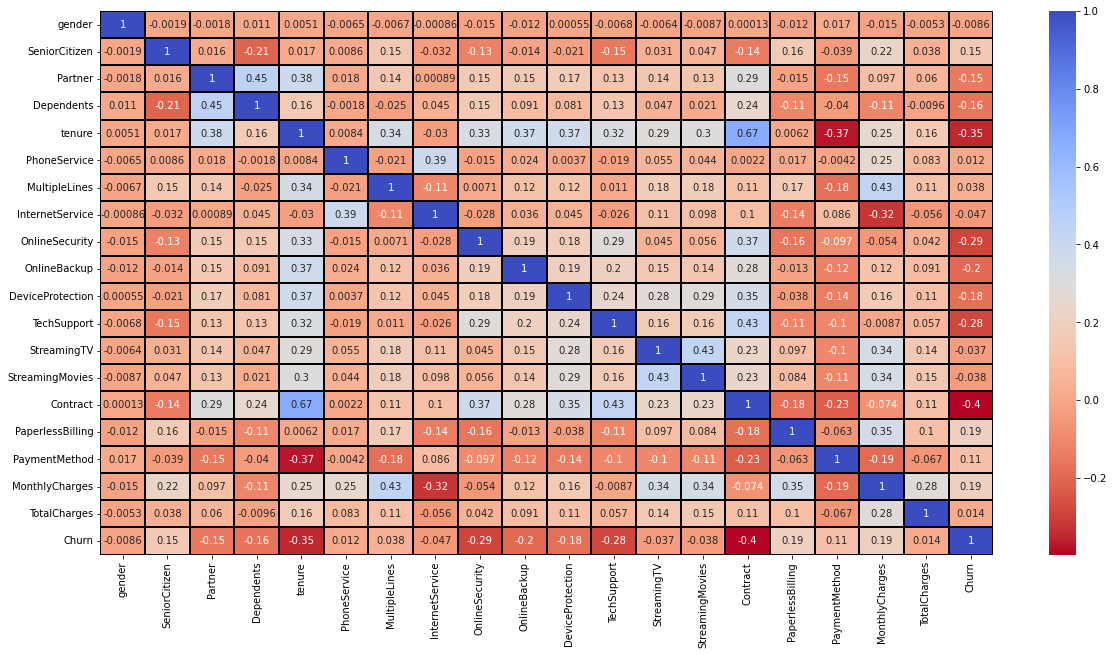

In [36]:
plt.figure(figsize=(20,10))
sns.heatmap(churn_corr, annot=True, linecolor="black", linewidths=2, cmap="coolwarm_r")

In [37]:
# Taking all the Independent variables in x
x=churn.iloc[:,0:-1]
x



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660


In [38]:
# Taking the target variable in y
y=churn.iloc[:,-1]
y



0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

# Splitting the Dataset into Train & Test:

In [39]:
# Importing the train_test_split and Accuracy Score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression



In [40]:
MaxAccu=0
MaxRS=0

for i in range (1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predlr_train=lr.predict(x_train)
    predlr_test=lr.predict(x_test)
    acc=accuracy_score(y_test,predlr_test)
    if acc>MaxAccu:
        MaxAccu=acc
        MaxRS=i
print("Best Accuracy is ", MaxAccu, "on Random State ", MaxRS)

Best Accuracy is  0.8205565019875071 on Random State  240


 Finding the best accuracy with best random state

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=463)

In [42]:
# Training the Logistic Regression Model
lr=LogisticRegression()
lr.fit(x_train,y_train)



LogisticRegression()

In [43]:
lr_pred=lr.predict(x_test)
lr_pred

array([0, 0, 0, ..., 1, 0, 0])

The Logistic Regression Model is predicting values based on training

In [44]:
print(accuracy_score(y_test,lr_pred))
print(confusion_matrix(y_test,lr_pred))
print(classification_report(y_test,lr_pred))

0.8188529244747302
[[1173  145]
 [ 174  269]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1318
           1       0.65      0.61      0.63       443

    accuracy                           0.82      1761
   macro avg       0.76      0.75      0.75      1761
weighted avg       0.82      0.82      0.82      1761



The Accuracy Score & Evolution Matrix of Logistic Regression Model

# Model Building using other Classifiers:

Decision Tree Classifier:

In [45]:
# Importing the Decision Tree Classifier Model
from sklearn.tree import DecisionTreeClassifier



In [46]:
MaxAccu=0
MaxRS=0

for i in range (1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    preddtc_train=dtc.predict(x_train)
    preddtc_test=dtc.predict(x_test)
    acc=accuracy_score(y_test,preddtc_test)
    if acc>MaxAccu:
        MaxAccu=acc
        MaxRS=i
print("Best Accuracy is ", MaxAccu, "on Random State ", MaxRS)


Best Accuracy is  0.7552526973310619 on Random State  210


Finding the best accuracy with best random state

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=73)

In [48]:
# Training the Decision Tree Classifier Model
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)



DecisionTreeClassifier()

In [49]:
dtc_pred=dtc.predict(x_test)
dtc_pred

array([1, 1, 0, ..., 1, 0, 0])

The Decision Tree Classifier Model is predicting the values based on training

In [50]:
print(accuracy_score(y_test,dtc_pred))
print(confusion_matrix(y_test,dtc_pred))
print(classification_report(y_test,dtc_pred))

0.7632027257240205
[[1104  228]
 [ 189  240]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1332
           1       0.51      0.56      0.54       429

    accuracy                           0.76      1761
   macro avg       0.68      0.69      0.69      1761
weighted avg       0.77      0.76      0.77      1761



The Accuracy Score and Evolution Matrix of Decision Tree Classifier Model

# Random Forest Classifier:

In [51]:
# Importing Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier



In [52]:
MaxAccu=0
MaxRS=0

for i in range (1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    predrfc_train=rfc.predict(x_train)
    predrfc_test=rfc.predict(x_test)
    acc=accuracy_score(y_test,predrfc_test)
    if acc>MaxAccu:
        MaxAccu=acc
        MaxRS=i
print("Best Accuracy is ", MaxAccu, "on Random State ", MaxRS)

Best Accuracy is  0.8171493469619534 on Random State  106


Finding the best accuracy with best random state

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=481)

In [54]:
# Training the Random Forest Classifier Model
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)



RandomForestClassifier()

In [55]:
rfc_pred=rfc.predict(x_test)
rfc_pred

array([1, 0, 0, ..., 0, 0, 0])

The Random Forest Classifier Model is predicting values based on training

In [56]:
print(accuracy_score(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))


0.817717206132879
[[1201  116]
 [ 205  239]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1317
           1       0.67      0.54      0.60       444

    accuracy                           0.82      1761
   macro avg       0.76      0.73      0.74      1761
weighted avg       0.81      0.82      0.81      1761



 The Accuracy Score and Evolution Matrix of Random Forest Classifier Model

# Adaboost Classifier:

In [57]:
# Importing the AdaBoostClassifier Model
from sklearn.ensemble import AdaBoostClassifier



In [58]:
MaxAccu=0
MaxRS=0

for i in range (1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    adb=AdaBoostClassifier()
    adb.fit(x_train,y_train)
    predadb_train=adb.predict(x_train)
    predadb_test=adb.predict(x_test)
    acc=accuracy_score(y_test,predadb_test)
    if acc>MaxAccu:
        MaxAccu=acc
        MaxRS=i
print("Best Accuracy is ", MaxAccu, "on Random State ", MaxRS)

Best Accuracy is  0.825099375354912 on Random State  341


Finding the best accuracy with best random state

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=20)

In [60]:
# Training the AdaBoostClassifier Model
adb=AdaBoostClassifier()
adb.fit(x_train,y_train)



AdaBoostClassifier()

In [61]:
adb_pred=adb.predict(x_test)
adb_pred


array([0, 0, 0, ..., 0, 1, 0])

The AdaBoostClassifier Model is predicting values based on training

In [62]:
print(accuracy_score(y_test,adb_pred))
print(confusion_matrix(y_test,adb_pred))
print(classification_report(y_test,adb_pred))

0.8160136286201022
[[1173  140]
 [ 184  264]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1313
           1       0.65      0.59      0.62       448

    accuracy                           0.82      1761
   macro avg       0.76      0.74      0.75      1761
weighted avg       0.81      0.82      0.81      1761



The Accuracy Score and Evolution Matrix of AdaBoostClassifier Model

# K Neighbors Classifier:

In [63]:
# Importing the K Neighbors Classifier Model
from sklearn.neighbors import KNeighborsClassifier



In [64]:
MaxAccu=0
MaxRS=0

for i in range (1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    knn=KNeighborsClassifier()
    knn.fit(x_train,y_train)
    predknn_train=knn.predict(x_train)
    predknn_test=knn.predict(x_test)
    acc=accuracy_score(y_test,predknn_test)
    if acc>MaxAccu:
        MaxAccu=acc
        MaxRS=i
print("Best Accuracy is ", MaxAccu, "on Random State ", MaxRS)

Best Accuracy is  0.7836456558773425 on Random State  106


Finding the best accuracy with best random state

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=341)

In [66]:
# Training the K Neighbors Classifier Model
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [67]:
knn_pred=knn.predict(x_test)
knn_pred

array([0, 0, 1, ..., 0, 1, 0])

The K Neighbors Classifier Model is predicting values based on training

In [68]:
print(accuracy_score(y_test,knn_pred))
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))


0.7688813174332766
[[1170  152]
 [ 255  184]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1322
           1       0.55      0.42      0.47       439

    accuracy                           0.77      1761
   macro avg       0.68      0.65      0.66      1761
weighted avg       0.75      0.77      0.76      1761



The Accuracy Score and Evolution Matrix of K Neighbors Classifier Model

# Cross Validation:

In [69]:
# Importing the Cross Validation Score
from sklearn.model_selection import cross_val_score



In [70]:
scr1=cross_val_score(lr, x, y, cv=5)
scr1

array([0.80269695, 0.79843861, 0.78850248, 0.80255682, 0.80184659])

In [71]:
print("The Cross Validation Score of Logistic Regression is :", scr1.mean())


The Cross Validation Score of Logistic Regression is : 0.7988082900509711


In [72]:
scr2=cross_val_score(dtc, x, y, cv=5)
scr2

array([0.73314407, 0.72959546, 0.72675656, 0.7109375 , 0.73153409])

In [73]:
print("The Cross Validation Score of Decision Tree Classifier is :", scr2.mean())

The Cross Validation Score of Decision Tree Classifier is : 0.7263935374862894


In [74]:
scr3=cross_val_score(rfc, x, y, cv=5)
scr3

array([0.79843861, 0.79772889, 0.77004968, 0.78835227, 0.79048295])

In [75]:
print("The Cross Validation Score of Random Forest Classifier is :", scr3.mean())

The Cross Validation Score of Random Forest Classifier is : 0.7890104805148719


In [76]:
scr4=cross_val_score(adb, x, y, cv=5)
scr4

array([0.8105039 , 0.80269695, 0.7920511 , 0.80539773, 0.80184659])

In [77]:
print("The Cross Validation Score of AdaBoost Classifier is :", scr4.mean())

The Cross Validation Score of AdaBoost Classifier is : 0.802499253984128


In [78]:
scr5=cross_val_score(knn, x, y, cv=5)
scr5

array([0.7430802 , 0.7523066 , 0.74946771, 0.734375  , 0.75710227])

In [79]:
print("The Cross Validation Score of K Neighbors Classifier is :", scr5.mean())

The Cross Validation Score of K Neighbors Classifier is : 0.7472663558939286


# Hyper Parameter Tuning:

In [80]:
# Importing Grid Search CV to perform Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV



In [81]:
parameter={"n_estimators":np.arange(2,10), 
           "algorithm":["SAMME","SAMME.R"],
          "learning_rate":np.arange(2,10),
          "random_state":np.arange(2,100)}

Taking all the parameters to find the best Accuracy Score 

In [82]:
GCV=GridSearchCV(AdaBoostClassifier(),parameter,cv=5)

In [83]:
# Training the GridSearchCV model
GCV.fit(x_train,y_train)



GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'random_state': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [84]:
GCV.best_params_

{'algorithm': 'SAMME',
 'learning_rate': 2,
 'n_estimators': 3,
 'random_state': 2}

In [85]:
final_model=AdaBoostClassifier(algorithm="SAMME", learning_rate=2, n_estimators=3, random_state=2)
final_model.fit(x_train,y_train)
final_model_pred=final_model.predict(x_test)
acc=accuracy_score(y_test,final_model_pred)
print(acc*100)

75.07098239636571


# Saving the Adaboost Model (Serialization):

In [86]:
# importing the Joblib function to perform Serialization
import joblib



In [87]:
# Dumping the Final model for deployment into the object file "Customer_Churn_Model.obj"
joblib.dump(final_model,"Customer_Churn_Model.obj")



['Customer_Churn_Model.obj']